In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from seminartools.models.utils import get_mse_by_country
from seminartools.data import read_merged
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.mucsvss_model import MUCSVSSModel
from seminartools.models.pca_var_model import PCAVARModel


muc_model = MUCSVSSModel(num_particles=100008, stochastic_seasonality=True)
muc_model.load_from_disk("../../models/mucsvss_model_100008_deterministic_all.pkl")
muc_model

# 1. Read data

In [28]:
df = read_merged().reset_index()
df

c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:173: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:409: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


country       date  inflation  gdp_growth  interest_rate  \
0             Japan 1977-01-01   0.022951    2.187257       6.333333   
1            Canada 1977-01-01   0.023904    1.533830       8.166667   
2     United States 1977-01-01   0.017231    1.186233       4.700000   
3             Japan 1977-04-01   0.027244    0.703788       5.000000   
4            Canada 1977-04-01   0.023346    0.510302       7.666667   
...             ...        ...        ...         ...            ...   
2166          Italy 2023-01-01   0.003938    0.552944       3.000000   
2167         Canada 2023-01-01   0.006080    0.610026       4.500000   
2168         Sweden 2023-01-01   0.014955    0.656897       2.833333   
2169          Korea 2023-01-01   0.010538    0.329875       3.500000   
2170   South Africa 2023-01-01   0.011202    0.406619       7.416667   

      unemployment_rate  commodity_CRUDE_PETRO  commodity_iNATGAS  \
0                   2.3                0.00000           0.052425   
1                   8.8                0.00000           0.052425   
2                   8.2                0.00000           0.052425   
3                   2.0               -0.00400           0.043586   
4                   8.0               -0.00400           0.043586   
...                 ...                    ...                ...   
2166                8.3               -0.02041          -0.585458   
2167                5.4               -0.02041          -0.585458   
2168                7.8               -0.02041          -0.585458   
2169                3.2               -0.02041          -0.585458   
2170               28.1               -0.02041          -0.585458   

      commodity_iAGRICULTURE  commodity_iMETMIN  commodity_iPRECIOUSMET  
0                   0.144757           0.041940                0.112740  
1                   0.144757           0.041940                0.112740  
2                   0.144757           0.041940                0.112740  
3                  -0.066688          -0.045412               -0.060029  
4                  -0.066688          -0.045412               -0.060029  
...                      ...                ...                     ...  
2166                0.002037           0.007418                0.043183  
2167                0.002037           0.007418                0.043183  
2168                0.002037           0.007418                0.043183  
2169                0.002037           0.007418                0.043183  
2170                0.002037           0.007418                0.043183  

[2171 rows x 11 columns]

In [29]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

# 2. Get stats (only top 5 models)

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x0000020DE1DAA350>)


100%|██████████| 20/20 [00:00<00:00, 117.95it/s]


Fitted!
Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x0000020D8232AA90>)


100%|██████████| 20/20 [00:00<00:00, 2151.09it/s]


Fitted!


c:\users\vandi\onedrive\documenten\github\seminar\seminartools\models\armax_model.py:211: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast += exog_coefs[j] * exogData[i-1]
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\models\armax_model.py:211: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast += exog_coefs[j] * exogData[i-1]
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\models\armax_model.py:211: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]


Fitting model on the full dataset... (model=<seminartools.models.mucsvss_model.MUCSVSSModel object at 0x0000020DB528C990>)
Fitted!


4qa        ar     uc_sv  pca_var_3  uc_sv_ss       arx  \
country                                                                       
Australia       0.000043  0.000047  0.000041   0.000053  0.000054  0.000050   
Belgium         0.000045  0.000049  0.000051   0.000050  0.000049  0.000066   
Canada          0.000046  0.000057  0.000044   0.000054  0.000033  0.000060   
Denmark         0.000033  0.000046  0.000037   0.000037  0.000024  0.000122   
France          0.000023  0.000028  0.000025   0.000020  0.000015  0.000076   
Germany         0.000028  0.000060  0.000038   0.000053  0.000031  0.000097   
Italy           0.000031  0.000043  0.000040   0.000053  0.000043  0.000059   
Japan           0.000024  0.000028  0.000024   0.000047  0.000027  0.000040   
Korea           0.000031  0.000036  0.000035   0.000049  0.000028  0.000060   
Netherlands     0.000060  0.000079  0.000064   0.000075  0.000053  0.000140   
New Zealand     0.000030  0.000029  0.000030   0.000057  0.000028  0.000041   
Norway          0.000054  0.000046  0.000058   0.000060  0.000055  0.002590   
Portugal        0.000091  0.000089  0.000100   0.000063  0.000042  0.000115   
South Africa    0.000069  0.000044  0.000048   0.000131  0.000039  0.000371   
Spain           0.000119  0.000081  0.000127   0.000109  0.000081  0.000120   
Sweden          0.000041  0.000053  0.000053   0.000054  0.000030  0.000258   
Switzerland     0.000026  0.000040  0.000039   0.000039  0.000027  0.001851   
Türkiye         0.000256  0.000312  0.000295   0.000336  0.000213  0.016005   
United Kingdom  0.000020  0.000024  0.000023   0.000016  0.000014  0.000158   
United States   0.000061  0.000066  0.000061   0.000062  0.000046  0.000071   

                    arma     armax  random_effects  random_effects_x  \
country                                                                
Australia       0.000042  0.005380        0.000053          0.000048   
Belgium         0.000072  0.002048        0.000043          0.000043   
Canada          0.000046  0.000261        0.000082          0.000071   
Denmark         0.000048  0.052415        0.000039          0.000044   
France          0.000071  0.000325        0.000027          0.000031   
Germany         0.000055  0.000243        0.000042          0.000043   
Italy           0.000044  0.000105        0.000037          0.000040   
Japan           0.000026  0.000098        0.000035          0.000029   
Korea           0.000082  0.005166        0.000034          0.000032   
Netherlands     0.000069  0.000474        0.000064          0.000065   
New Zealand     0.000028  0.000145        0.000032          0.000036   
Norway          0.000089  0.002988        0.000056          0.000058   
Portugal        0.000059  0.001281        0.000130          0.000141   
South Africa    0.000083  0.087764        0.000057          0.000058   
Spain           0.000062  0.000155        0.000242          0.000252   
Sweden          0.000042  0.007667        0.000068          0.000077   
Switzerland     0.000040  0.009206        0.000045          0.000037   
Türkiye         0.001538  0.414811        0.000295          0.000347   
United Kingdom  0.002996  0.002342        0.000024          0.000029   
United States   0.000050  0.000177        0.000102          0.000089   

                distance  distance_x   mucsvss  
country                                         
Australia       0.000053    0.000052  0.000052  
Belgium         0.000045    0.000054  0.000046  
Canada          0.000083    0.000072  0.000208  
Denmark         0.000039    0.000055  0.000043  
France          0.000027    0.000055  0.000036  
Germany         0.000041    0.000046  0.000052  
Italy           0.000037    0.000045  0.000397  
Japan           0.000035    0.000032  0.000028  
Korea           0.000034    0.000032  0.000039  
Netherlands     0.000064    0.000072  0.000079  
New Zealand     0.000032    0.000039  0.000927  
Norway          0.000054    0.000081  0.000150  
Portugal   

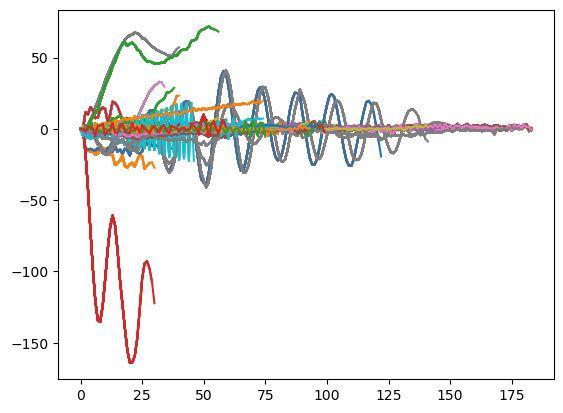

In [30]:
from seminartools.models.utils import get_mse_by_country
exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]
stats = get_mse_by_country(
    [
        ("4qa", lambda: FourQuarterAverageModel()),
        ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
        (
            "uc_sv",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
        ),
        ("pca_var_3", lambda: PCAVARModel()),
        (
            "uc_sv_ss",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
        ),
           (
            "arx",
            lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
        ),
        ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "armax",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
        ),
      
        ("random_effects", lambda: RandomEffectsModel()),
        (
            "random_effects_x",
            lambda: RandomEffectsModel(exogenous_columns=exog_columns),
        ),
        ("distance", lambda: DistanceModel()),
        ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
        ("mucsvss", lambda: muc_model),
        
     
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)
stats

# 3. Plot the Data

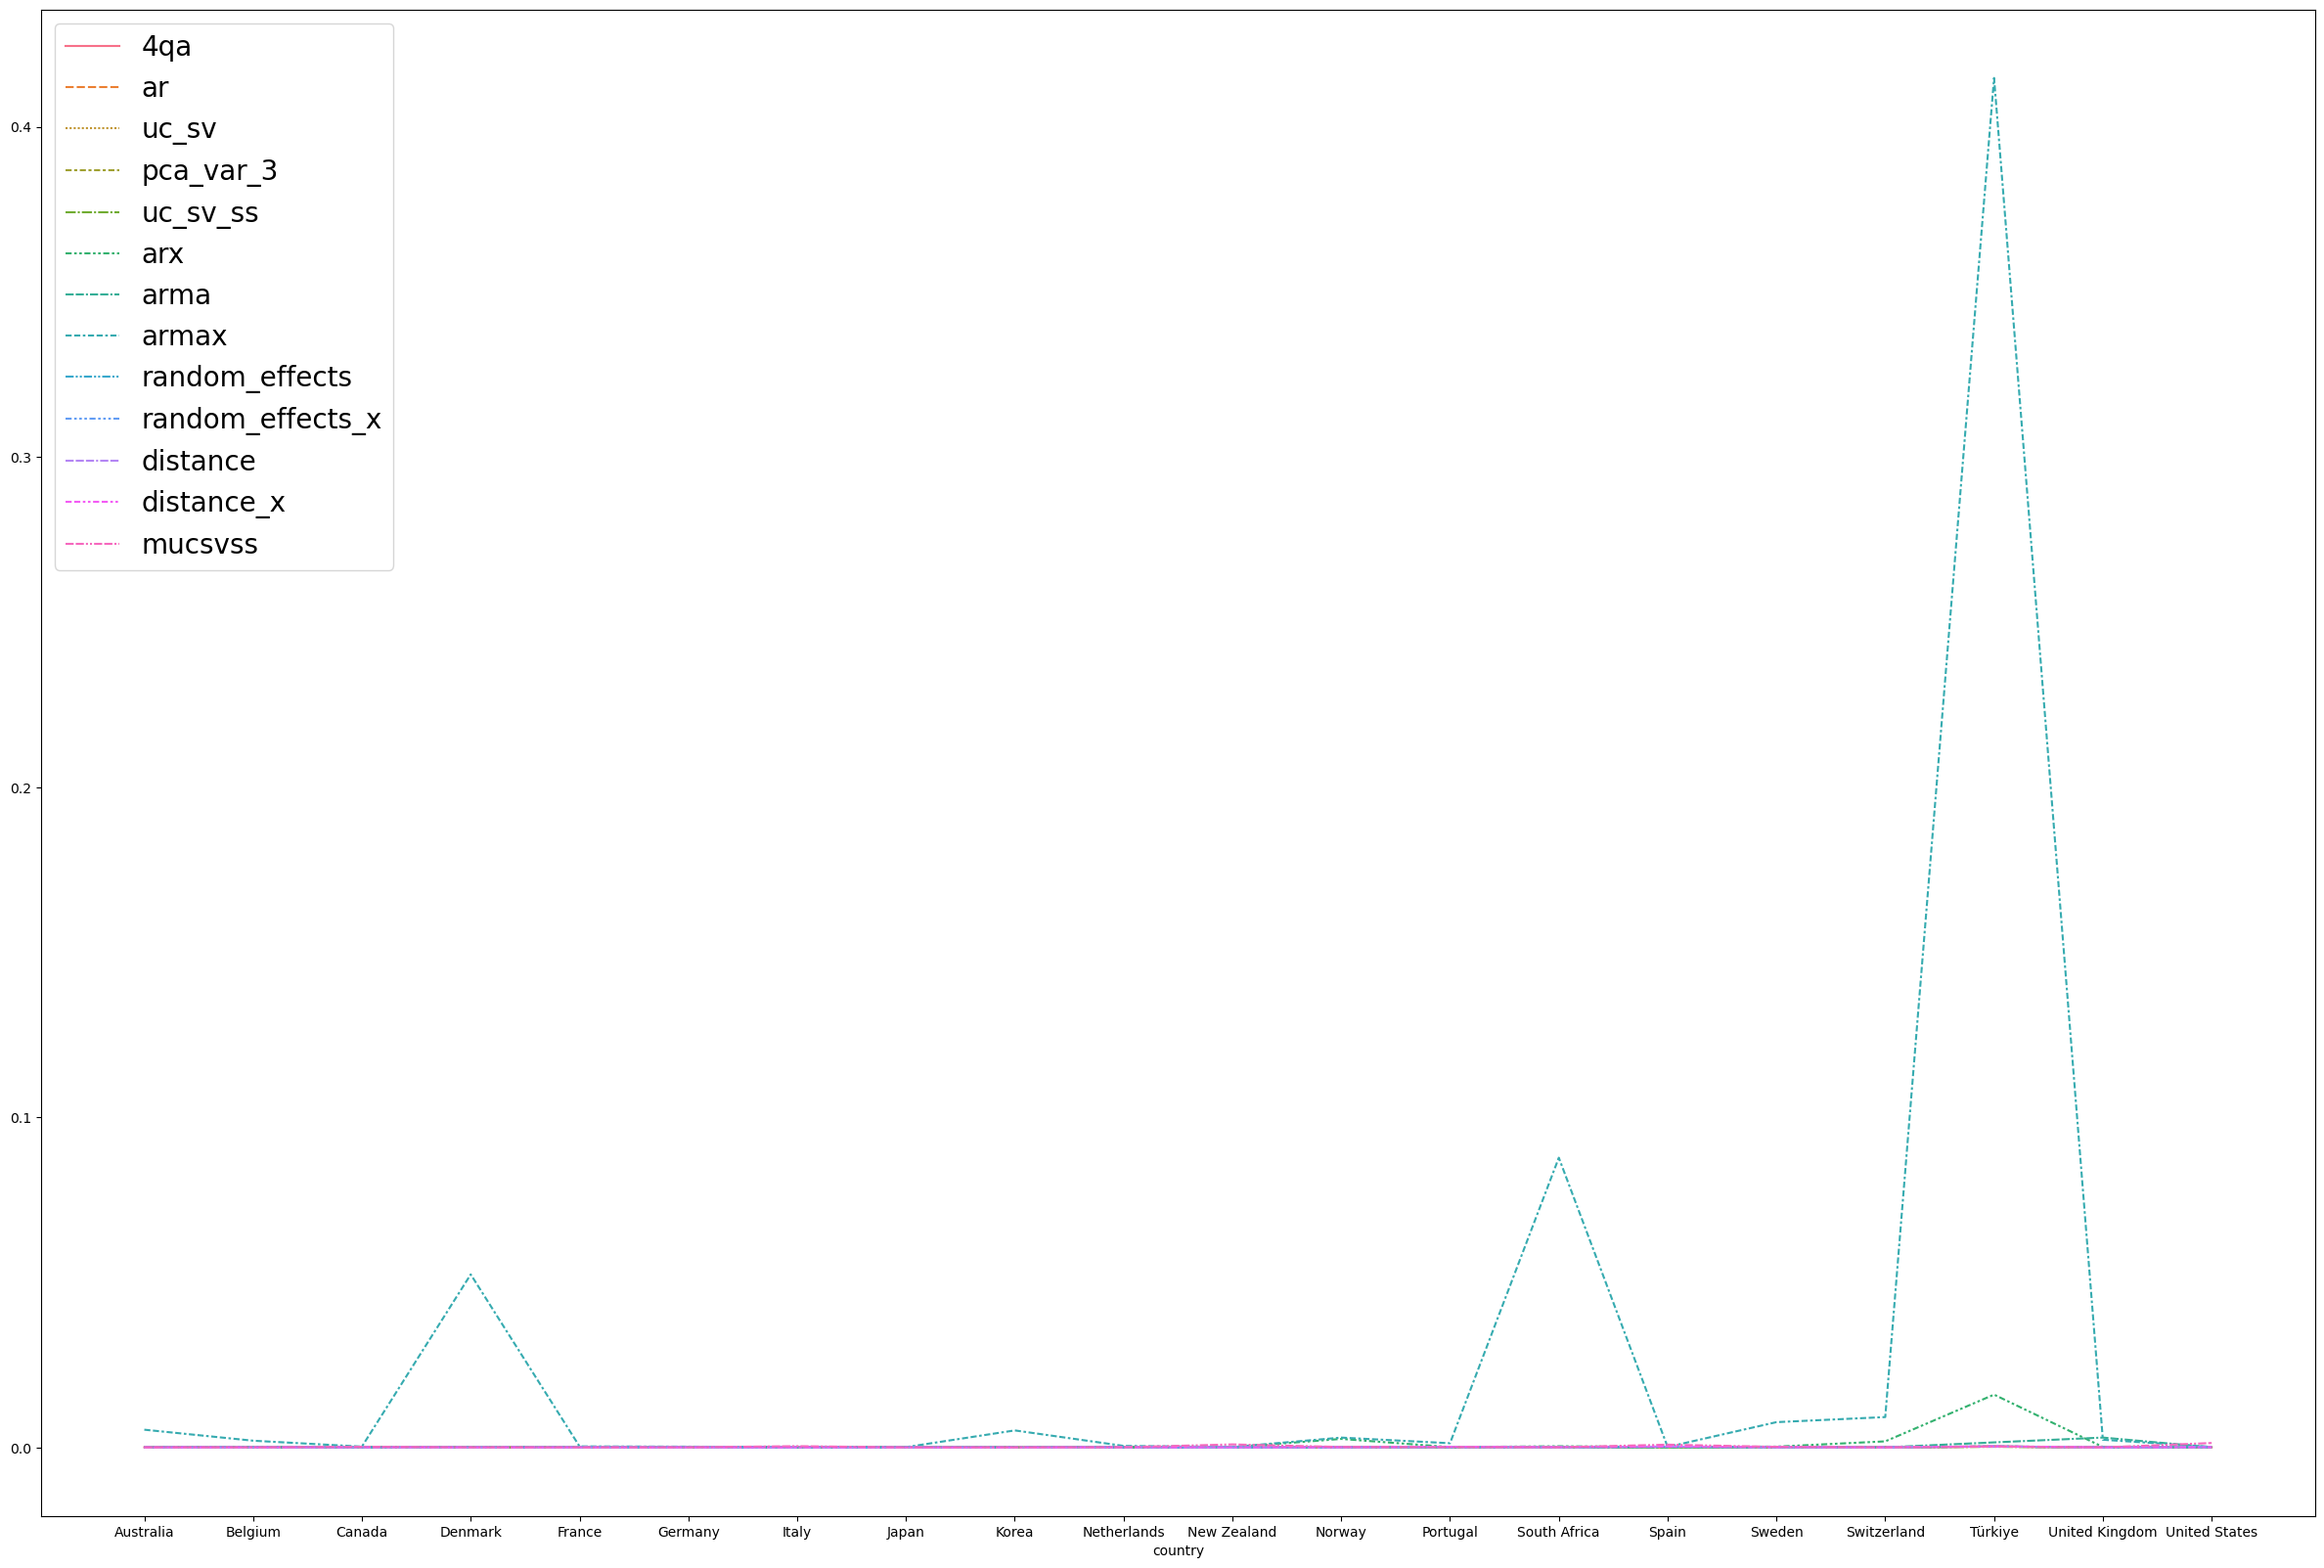

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.lineplot(
    data = stats
)
plt.legend(loc = 'upper left', fontsize = "20")


In [9]:
#Run this if you want relative mspes!!
stats_rescaled = stats.div(stats['uc_sv'], axis = 'index' )
stats_rescaled

4qa        ar  uc_sv  pca_var_3  uc_sv_ss        arx  \
country                                                                     
Australia       1.033022  1.122432    1.0   1.273257  1.118626   1.210402   
Belgium         0.870966  0.961962    1.0   0.973468  0.948300   1.283704   
Canada          1.039791  1.275472    1.0   1.202945  0.716230   1.343602   
Denmark         0.994730  1.393019    1.0   1.131952  0.720721   3.737040   
France          0.912751  1.126471    1.0   0.820570  0.590823   3.080671   
Germany         0.795584  1.725057    1.0   1.530159  0.813892   2.794096   
Italy           0.764791  1.066258    1.0   1.326787  1.071655   1.479056   
Japan           1.003863  1.177816    1.0   1.953061  1.111283   1.669840   
Korea           0.916681  1.066970    1.0   1.449780  0.827681   1.777949   
Netherlands     1.027010  1.347063    1.0   1.269357  0.834442   2.374023   
New Zealand     1.003901  0.981477    1.0   1.902521  0.952681   1.361138   
Norway          1.016213  0.866404    1.0   1.120896  0.949534  48.637496   
Portugal        0.906897  0.888457    1.0   0.632176  0.422691   1.149454   
South Africa    1.446401  0.917428    1.0   2.736858  0.804294   7.751988   
Spain           0.942925  0.638790    1.0   0.862308  0.724575   0.949955   
Sweden          0.786582  1.024072    1.0   1.046886  0.550412   4.969625   
Switzerland     0.689361  1.081367    1.0   1.057450  0.797866  49.885311   
Türkiye         0.884053  1.078266    1.0   1.158061  0.749982  55.227406   
United Kingdom  0.871756  1.046273    1.0   0.723853  0.637590   6.988494   
United States   1.008287  1.083058    1.0   1.022325  0.779978   1.171573   

                      arma        armax  random_effects  random_effects_x  \
country                                                                     
Australia         1.010571   129.283684        1.268858          1.165768   
Belgium           1.405361    39.908515        0.840801          0.835928   
Canada            1.034560     5.835012        1.839858          1.595259   
Denmark           1.462764  1600.317117        1.201889          1.323564   
France            2.854376    13.140081        1.111377          1.252173   
Germany           1.593057     6.992352        1.210614          1.235887   
Italy             1.105699     2.613576        0.919230          0.989945   
Japan             1.077616     4.098762        1.459301          1.195152   
Korea             2.419716   151.978345        0.986632          0.937140   
Netherlands       1.177022     8.057326        1.088620          1.102214   
New Zealand       0.947574     4.829855        1.074878          1.192088   
Norway            1.669520    56.113886        1.058396          1.088587   
Portugal          0.588868    12.821907        1.304562          1.413324   
South Africa      1.726251  1834.619785        1.189622          1.207841   
Spain             0.492799     1.219681        1.912439          1.985727   
Sweden            0.811757   147.592115        1.314369          1.489234   
Switzerland       1.082261   248.088496        1.209227          1.001830   
Türkiye           5.308364  1431.327618        1.019878          1.208960   
United Kingdom  132.317596   103.421675        1.048118          1.290725   
United States     0.819505     2.920900        1.685769          1.462270   

                distance  distance_x    mucsvss  
country                                          
Australia       1.281109    1.239656   1.254194  
Belgium         0.881095    1.069393   0.891771  
Canada          1.866295    1.624325   4.663904  
Denmark         1.197465    1.688067   1.320787  
France          1.102797    2.255800   1.470194  
Germany         1.191041    1.326554   1.490530  
Italy           0.910155    1.112834   9.924127  
Japan           1.439272    1.311411   1.188891  
Korea           1.001697    0.946364   1.160885  
Netherlands     1.087349    1.237124   1.345139  
New Zealand     1.083375    1.3

In [10]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    stats_rescaled.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="Country-specific relative MSPE per model, out-of-sample, 2000-2023",
        label="tab:model_eval_country_spec",
        float_format="%.4f",
    )
)

\begin{table}
\caption{Country-specific relative MSPE per model, out-of-sample, 2000-2023}
\label{tab:model_eval_country_spec}
\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & 4qa & ar & uc\_sv & pca\_var\_3 & uc\_sv\_ss & arx & arma & armax & random\_effects & random\_effects\_x & distance & distance\_x & mucsvss \\
country &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
Australia & 1.0330 & 1.1224 & 1.0000 & 1.2733 & 1.1186 & 1.2104 & 1.0106 & 129.2837 & 1.2689 & 1.1658 & 1.2811 & 1.2397 & 1.2542 \\
Belgium & 0.8710 & 0.9620 & 1.0000 & 0.9735 & 0.9483 & 1.2837 & 1.4054 & 39.9085 & 0.8408 & 0.8359 & 0.8811 & 1.0694 & 0.8918 \\
Canada & 1.0398 & 1.2755 & 1.0000 & 1.2029 & 0.7162 & 1.3436 & 1.0346 & 5.8350 & 1.8399 & 1.5953 & 1.8663 & 1.6243 & 4.6639 \\
Denmark & 0.9947 & 1.3930 & 1.0000 & 1.1320 & 0.7207 & 3.7370 & 1.4628 & 1600.3171 & 1.2019 & 1.3236 & 1.1975 & 1.6881 & 1.3208 \\
France & 0.9128 & 1.1265 & 1.0000 & 0.8206 & 0.5908 & 3.0807 & 2.8544 & 13.1401 & 1.1114 & 1.2522 & 1.1028 &

C:\Users\vandi\AppData\Local\Temp\ipykernel_10216\1199517908.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax= axes[index],data = stats_country, y = country, x = "index", palette = sns.color_palette("tab10"))
C:\Users\vandi\AppData\Local\Temp\ipykernel_10216\1199517908.py:14: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(ax= axes[index],data = stats_country, y = country, x = "index", palette = sns.color_palette("tab10"))
C:\Users\vandi\AppData\Local\Temp\ipykernel_10216\1199517908.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax= axes[index],data = stats_country, y = country, x = 

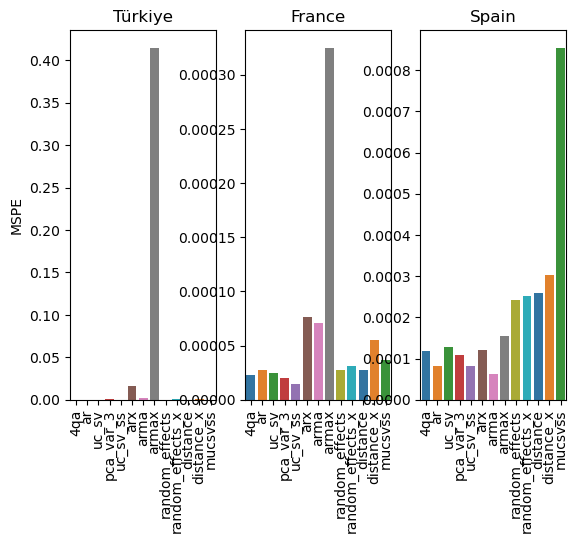

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ["Türkiye", "France", "Spain"] #one where ARMA is bad, one where all similar, one where MUCSVSS is bad
# countries = (df["country"].unique())

fig, axes = plt.subplots(1, 3, sharex=True)

    
for index, country in enumerate(countries):
    stats_country = stats.loc[country]
    stats_country = stats_country.reset_index()
    stats_country
    sns.barplot(ax= axes[index],data = stats_country, y = country, x = "index", palette = sns.color_palette("tab10"))
    
    # axes[index].set_title(country)
    axes[index].tick_params(axis='x', rotation= 90)  # Rotate x-axis labels for each subplot individually
    axes[index].set_xlabel("")
    axes[index].set_title(country)

    if index == 0:
        axes[index].set_ylabel("MSPE")
    else:
        axes[index].set_ylabel("")  # Set empty string for y-label


# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Remove ARX and ARMAX from the plot, because of their bad performance

In [12]:
stats

4qa        ar  uc_sv  pca_var_3  uc_sv_ss        arx  \
country                                                                     
Australia       1.033022  1.122432    1.0   1.273257  1.118626   1.210402   
Belgium         0.870966  0.961962    1.0   0.973468  0.948300   1.283704   
Canada          1.039791  1.275472    1.0   1.202945  0.716230   1.343602   
Denmark         0.994730  1.393019    1.0   1.131952  0.720721   3.737040   
France          0.912751  1.126471    1.0   0.820570  0.590823   3.080671   
Germany         0.795584  1.725057    1.0   1.530159  0.813892   2.794096   
Italy           0.764791  1.066258    1.0   1.326787  1.071655   1.479056   
Japan           1.003863  1.177816    1.0   1.953061  1.111283   1.669840   
Korea           0.916681  1.066970    1.0   1.449780  0.827681   1.777949   
Netherlands     1.027010  1.347063    1.0   1.269357  0.834442   2.374023   
New Zealand     1.003901  0.981477    1.0   1.902521  0.952681   1.361138   
Norway          1.016213  0.866404    1.0   1.120896  0.949534  48.637496   
Portugal        0.906897  0.888457    1.0   0.632176  0.422691   1.149454   
South Africa    1.446401  0.917428    1.0   2.736858  0.804294   7.751988   
Spain           0.942925  0.638790    1.0   0.862308  0.724575   0.949955   
Sweden          0.786582  1.024072    1.0   1.046886  0.550412   4.969625   
Switzerland     0.689361  1.081367    1.0   1.057450  0.797866  49.885311   
Türkiye         0.884053  1.078266    1.0   1.158061  0.749982  55.227406   
United Kingdom  0.871756  1.046273    1.0   0.723853  0.637590   6.988494   
United States   1.008287  1.083058    1.0   1.022325  0.779978   1.171573   

                      arma        armax  random_effects  random_effects_x  \
country                                                                     
Australia         1.010571   129.283684        1.268858          1.165768   
Belgium           1.405361    39.908515        0.840801          0.835928   
Canada            1.034560     5.835012        1.839858          1.595259   
Denmark           1.462764  1600.317117        1.201889          1.323564   
France            2.854376    13.140081        1.111377          1.252173   
Germany           1.593057     6.992352        1.210614          1.235887   
Italy             1.105699     2.613576        0.919230          0.989945   
Japan             1.077616     4.098762        1.459301          1.195152   
Korea             2.419716   151.978345        0.986632          0.937140   
Netherlands       1.177022     8.057326        1.088620          1.102214   
New Zealand       0.947574     4.829855        1.074878          1.192088   
Norway            1.669520    56.113886        1.058396          1.088587   
Portugal          0.588868    12.821907        1.304562          1.413324   
South Africa      1.726251  1834.619785        1.189622          1.207841   
Spain             0.492799     1.219681        1.912439          1.985727   
Sweden            0.811757   147.592115        1.314369          1.489234   
Switzerland       1.082261   248.088496        1.209227          1.001830   
Türkiye           5.308364  1431.327618        1.019878          1.208960   
United Kingdom  132.317596   103.421675        1.048118          1.290725   
United States     0.819505     2.920900        1.685769          1.462270   

                distance  distance_x    mucsvss  
country                                          
Australia       1.281109    1.239656   1.254194  
Belgium         0.881095    1.069393   0.891771  
Canada          1.866295    1.624325   4.663904  
Denmark         1.197465    1.688067   1.320787  
France          1.102797    2.255800   1.470194  
Germany         1.191041    1.326554   1.490530  
Italy           0.910155    1.112834   9.924127  
Japan           1.439272    1.311411   1.188891  
Korea           1.001697    0.946364   1.160885  
Netherlands     1.087349    1.237124   1.345139  
New Zealand     1.083375    1.3

C:\Users\vandi\AppData\Local\Temp\ipykernel_10216\3890963937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax= axes[index],data = stats_country_plot, y = country, x = "index", palette = sns.color_palette("tab10"))
C:\Users\vandi\AppData\Local\Temp\ipykernel_10216\3890963937.py:8: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(ax= axes[index],data = stats_country_plot, y = country, x = "index", palette = sns.color_palette("tab10"))
C:\Users\vandi\AppData\Local\Temp\ipykernel_10216\3890963937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax= axes[index],data = stats_country_plot, y = c

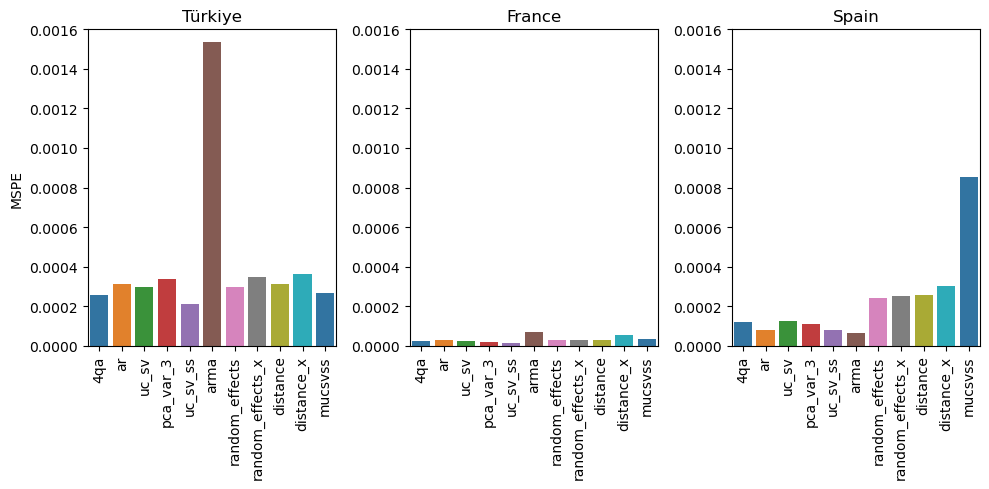

In [42]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize = (10,5))
stats_plot = stats.drop(columns = ["arx", "armax"])
    
for index, country in enumerate(countries):
    stats_country_plot = stats_plot.loc[country]
    stats_country_plot = stats_country_plot.reset_index()
    stats_country_plot
    sns.barplot(ax= axes[index],data = stats_country_plot, y = country, x = "index", palette = sns.color_palette("tab10"))
    
    # axes[index].set_title(country)
    axes[index].tick_params(axis='x', rotation= 90)  # Rotate x-axis labels for each subplot individually
    axes[index].set_xlabel("")
    axes[index].set_title(country)
    #have same y_axis in every figure
    axes[index].set_ylim(0,0.0016)
    if index == 0:
        axes[index].set_ylabel("MSPE")
    else:
        axes[index].set_ylabel("")  # Set empty string for y-label


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# 4. Play around with sets of exogenous variables for VARX

In [39]:
from seminartools.models.utils import get_mse_by_country
from seminartools.data import read_merged

In [40]:
df = read_merged().reset_index()
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
df

c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:161: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:397: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


country       date  inflation  gdp_growth  interest_rate  \
0             Japan 1977-01-01   0.022951    2.187257       6.333333   
1            Canada 1977-01-01   0.023904    1.533830       8.166667   
2     United States 1977-01-01   0.017231    1.186233       4.700000   
3             Japan 1977-04-01   0.027244    0.703788       5.000000   
4            Canada 1977-04-01   0.023346    0.510302       7.666667   
...             ...        ...        ...         ...            ...   
2166          Italy 2023-01-01   0.003938    0.552944       3.000000   
2167         Canada 2023-01-01   0.006080    0.610026       4.500000   
2168         Sweden 2023-01-01   0.014955    0.656897       2.833333   
2169          Korea 2023-01-01   0.010538    0.329875       3.500000   
2170   South Africa 2023-01-01   0.011202    0.406619       7.416667   

      unemployment_rate  commodity_CRUDE_PETRO  commodity_iNATGAS  \
0                   2.3                0.00000           0.052425   
1                   8.8                0.00000           0.052425   
2                   8.2                0.00000           0.052425   
3                   2.0               -0.00400           0.043586   
4                   8.0               -0.00400           0.043586   
...                 ...                    ...                ...   
2166                8.3               -0.02041          -0.585458   
2167                5.4               -0.02041          -0.585458   
2168                7.8               -0.02041          -0.585458   
2169                3.2               -0.02041          -0.585458   
2170               28.1               -0.02041          -0.585458   

      commodity_iAGRICULTURE  commodity_iMETMIN  commodity_iPRECIOUSMET  
0                   0.144757           0.041940                0.112740  
1                   0.144757           0.041940                0.112740  
2                   0.144757           0.041940                0.112740  
3                  -0.066688          -0.045412               -0.060029  
4                  -0.066688          -0.045412               -0.060029  
...                      ...                ...                     ...  
2166                0.002037           0.007418                0.043183  
2167                0.002037           0.007418                0.043183  
2168                0.002037           0.007418                0.043183  
2169                0.002037           0.007418                0.043183  
2170                0.002037           0.007418                0.043183  

[2171 rows x 11 columns]

c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inverti

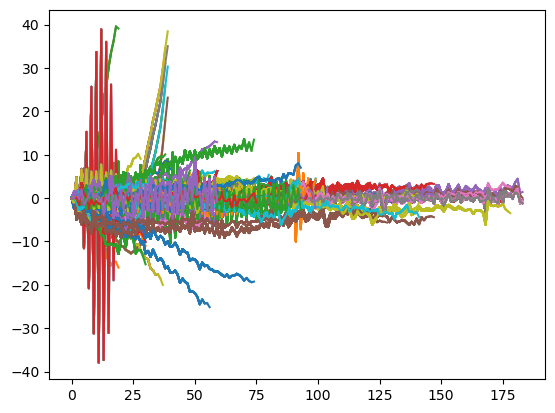

In [41]:
from seminartools.models.armax_model import ARMAXModel
stats = get_mse_by_country(
    [
        
        ("nothing", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "gdp_growth",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=["gdp_growth"]),
        ),
        (
            "interest_rate",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns= ["interest_rate"]),
        ),
        (
            "commo",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns= ["commodity_CRUDE_PETRO"]),
        ),
        (
            "unem",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns= ["unemployment_rate"]),
        ),
        
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)

In [42]:
stats

nothing  gdp_growth  interest_rate     commo      unem
country                                                                
Australia       0.004289    0.004249       0.011517  0.004234  0.037161
Belgium         0.007357    0.008083       0.107039  0.009393  0.005962
Canada          0.004714    0.004926       0.030422  0.004537  0.004845
Denmark         0.004887    0.035397       0.174788  0.007191  0.005169
France          0.007198    0.013605       0.008887  0.004844  0.017496
Germany         0.005645    0.005871       0.006890  0.010243  0.005966
Italy           0.004516    0.006055       0.029788  0.005102  0.005227
Japan           0.002632    0.002767       0.056030  0.002919  0.112457
Korea           0.008390    0.023647       0.014030  0.028156  0.231367
Netherlands     0.007059    0.007867       0.341624  0.021858  0.010709
New Zealand     0.002893    0.003368       0.004132  0.002680  0.044689
Norway          0.009067    0.012566       0.066106  0.010069  1.373151
Portugal        0.006001    0.008191       0.006625  0.033062  0.006819
South Africa    0.008423    0.093477       0.701753  0.157485  0.010092
Spain           0.006370    0.034632       0.006204  0.006610  0.007133
Sweden          0.004301    0.088402       0.036299  0.012616  0.004857
Switzerland     0.004096    0.028652       0.083371  0.003276  0.012171
Türkiye         0.156918    0.167006       0.296357  0.158928  0.173994
United Kingdom  0.305610    0.016884       0.637039  0.816972  0.428412
United States   0.005078    0.005727       0.013684  0.004722  0.005425

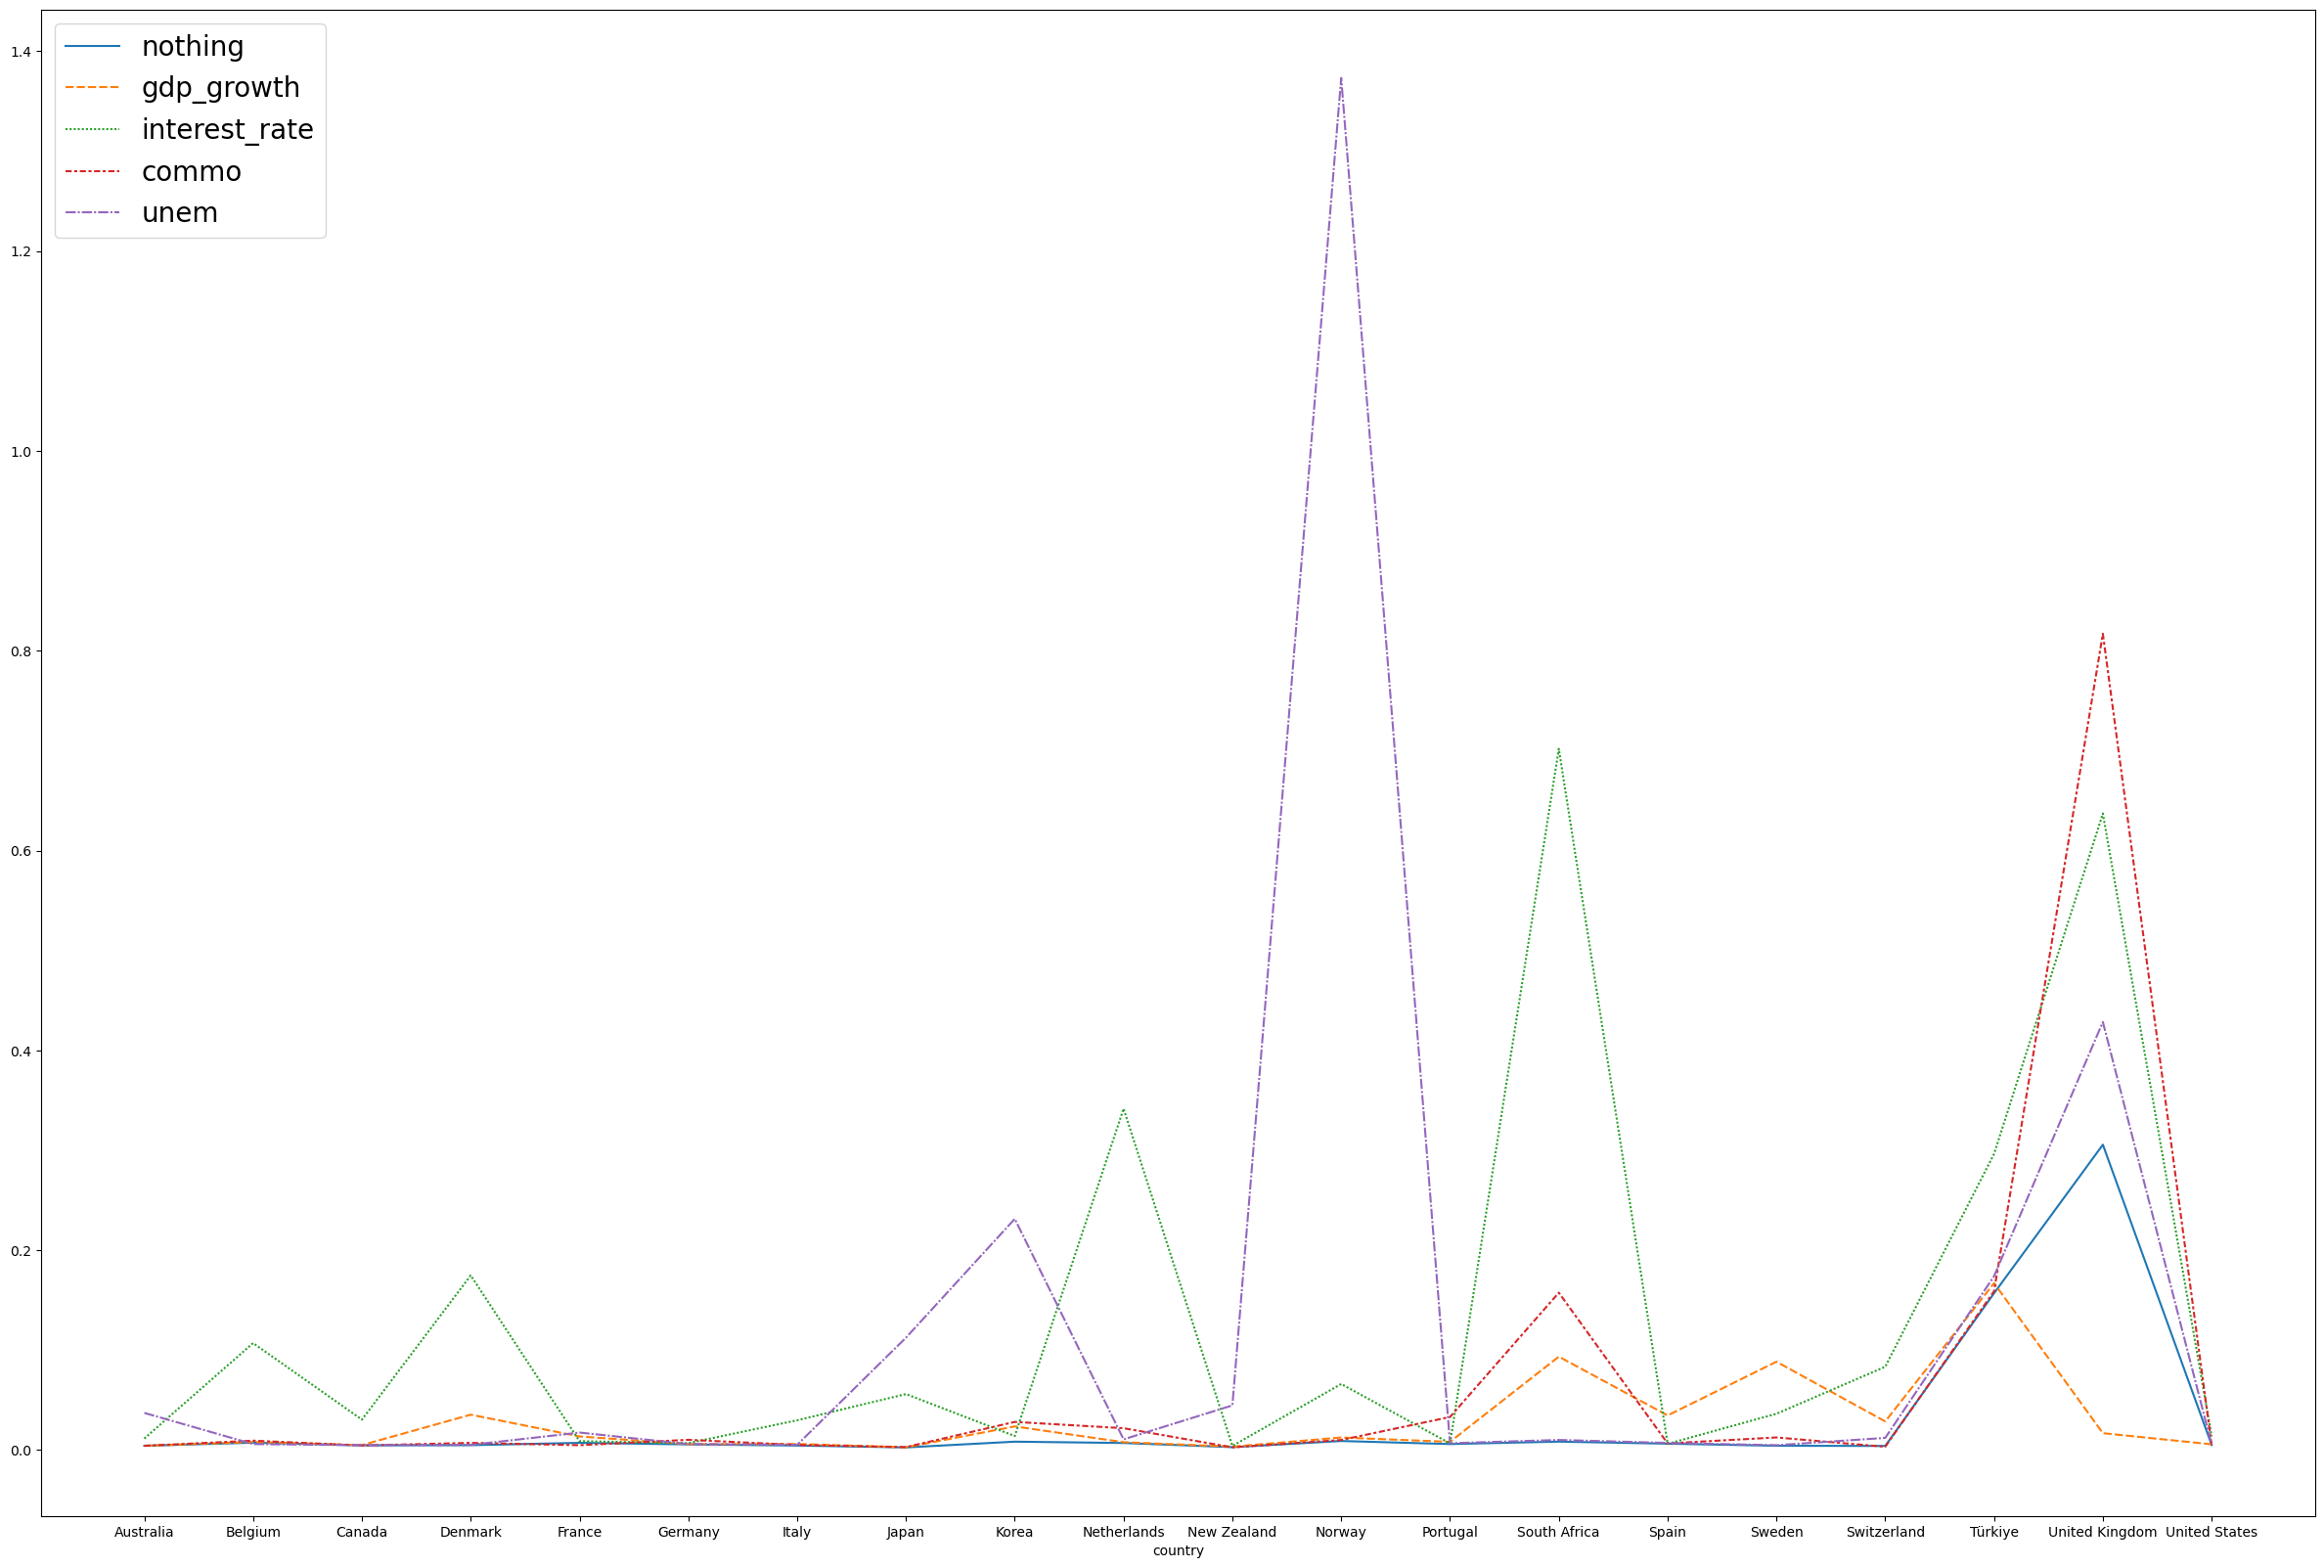

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
#data=stats.drop(["Norway", "United Kingdom"], axis=0)
plt.figure(figsize=(30,20))
sns.lineplot(
    data = stats
)
plt.legend(loc = 'upper left', fontsize = "20")

Note that unemployment performance especially bad for norway, interest rates for south africa, and everything apart from gdp growth performs poorly for the UK. However, if you remove those from the sample, 'nothing' still performs best

In [44]:
data = stats.drop(["Norway", "United Kingdom", "South Africa"], axis=0)
print(stats.mean())
print(data.mean())


nothing          0.028272
gdp_growth       0.028569
interest_rate    0.131629
commo            0.065245
unem             0.125155
dtype: float64
nothing          0.014256
gdp_growth       0.026379
interest_rate    0.072217
commo            0.018845
unem             0.040673
dtype: float64


c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:161: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:397: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vandi\Ap

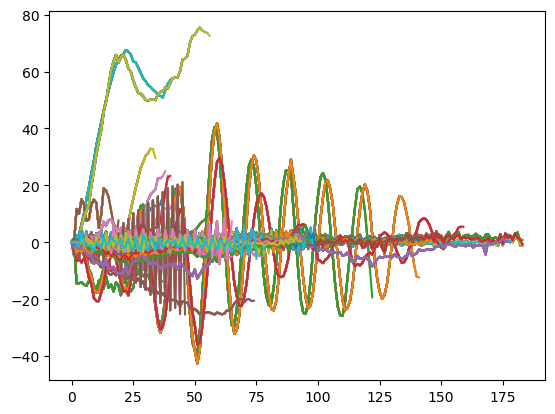

In [45]:
from seminartools.models.armax_model import ARMAXModel
df = read_merged(remove_countries= ["Türkiye"]).reset_index()

exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats2 = get_mse_by_country(
    [
        
        ("nothing", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "all",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns= exog_columns),
        ),
        
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)

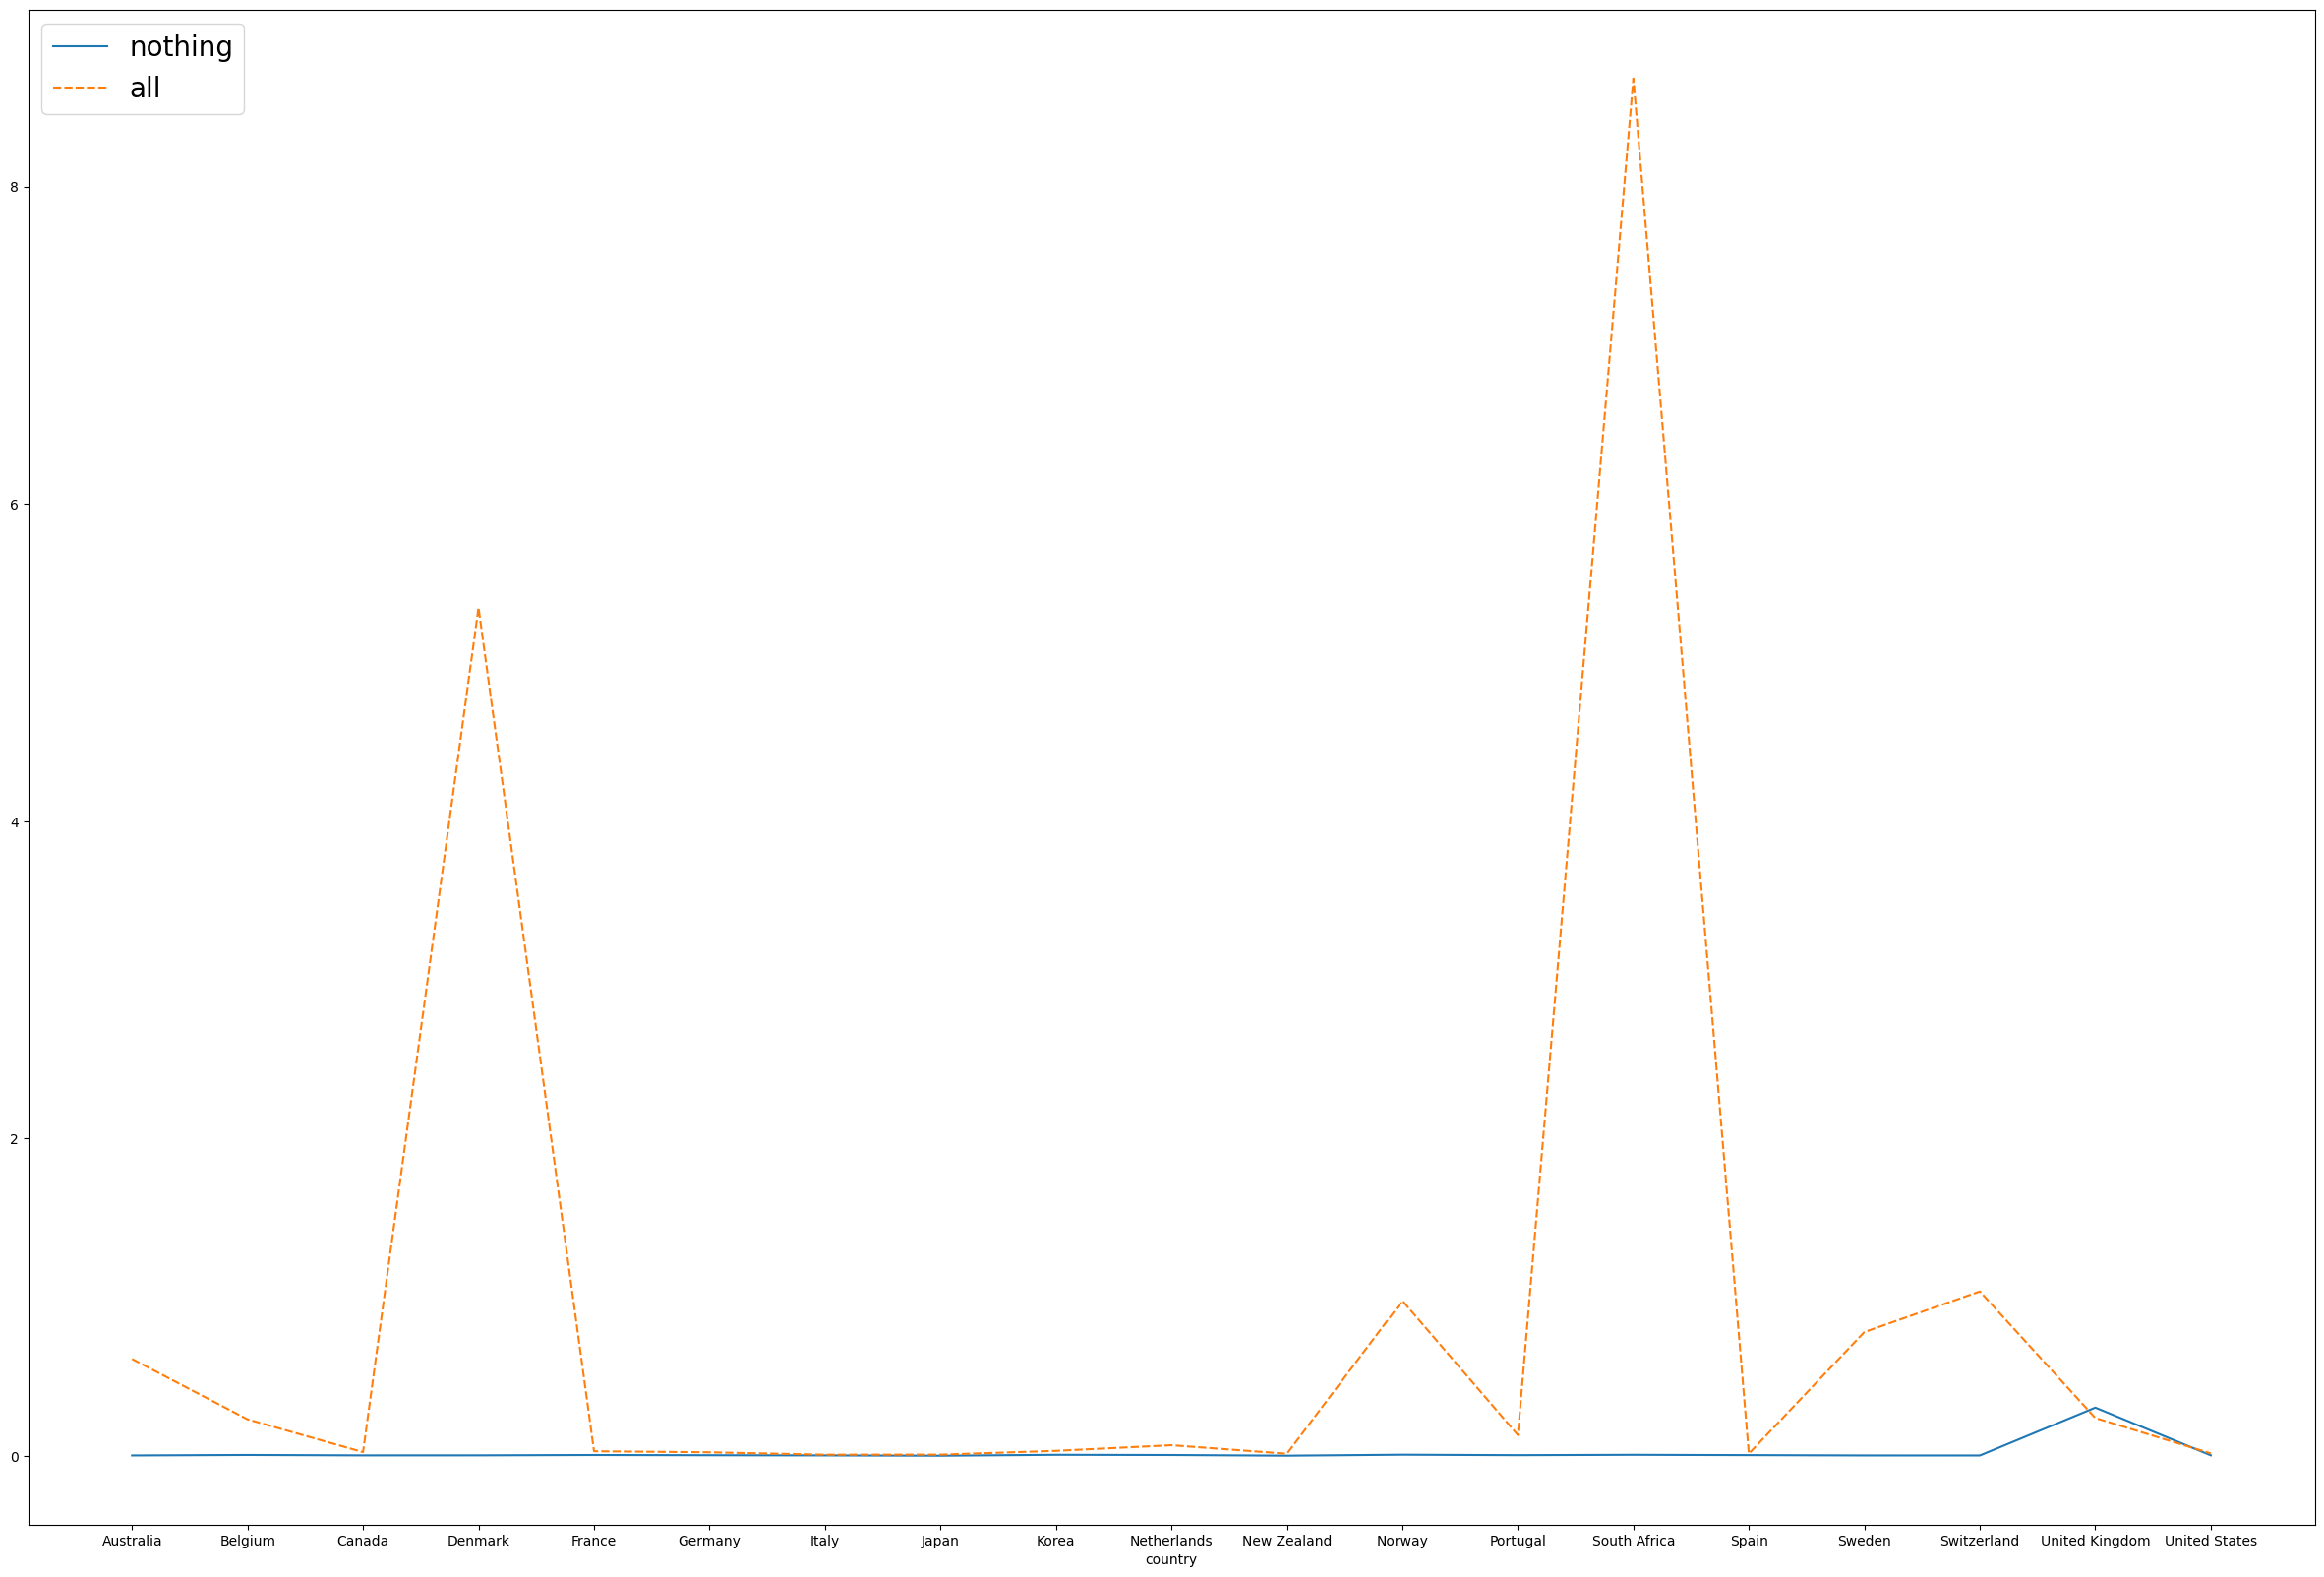

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.lineplot(
    data = stats2
)
plt.legend(loc = 'upper left', fontsize = "20")

In [48]:
stats2.mean()

nothing    0.021501
all        0.962741
dtype: float64